In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [3]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

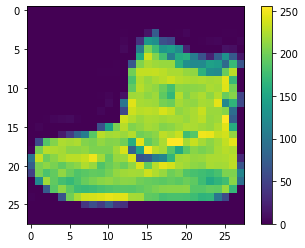

In [17]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [18]:
train_images=train_images/255
test_images=test_images/255

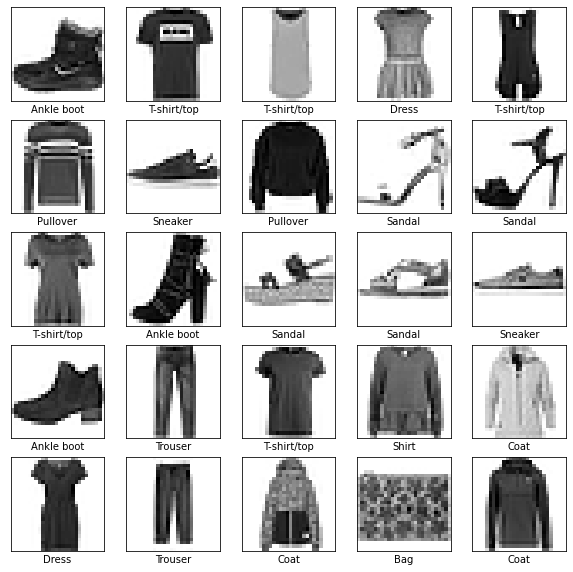

In [22]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [24]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4974 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3763 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3387 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3152 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2962 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2698 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2601 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2484 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.240

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n Test accuracy:',test_acc)

313/313 - 1s - loss: 0.3365 - accuracy: 0.8863

 Test accuracy: 0.8863000273704529


In [28]:
probability_model=tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [29]:
predictions=probability_model.predict(test_images)

In [33]:
predictions[0]

array([4.98038872e-08, 9.70653505e-12, 9.59042401e-10, 5.58175793e-13,
       4.78750303e-11, 1.28931727e-03, 1.04362154e-08, 3.92357595e-02,
       2.48603776e-10, 9.59474862e-01], dtype=float32)

In [34]:
np.argmax(predictions[0])

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img=true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label=true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label=np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

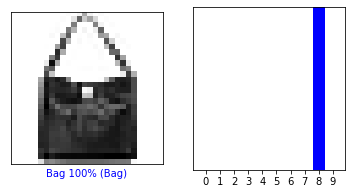

In [38]:
i=700
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

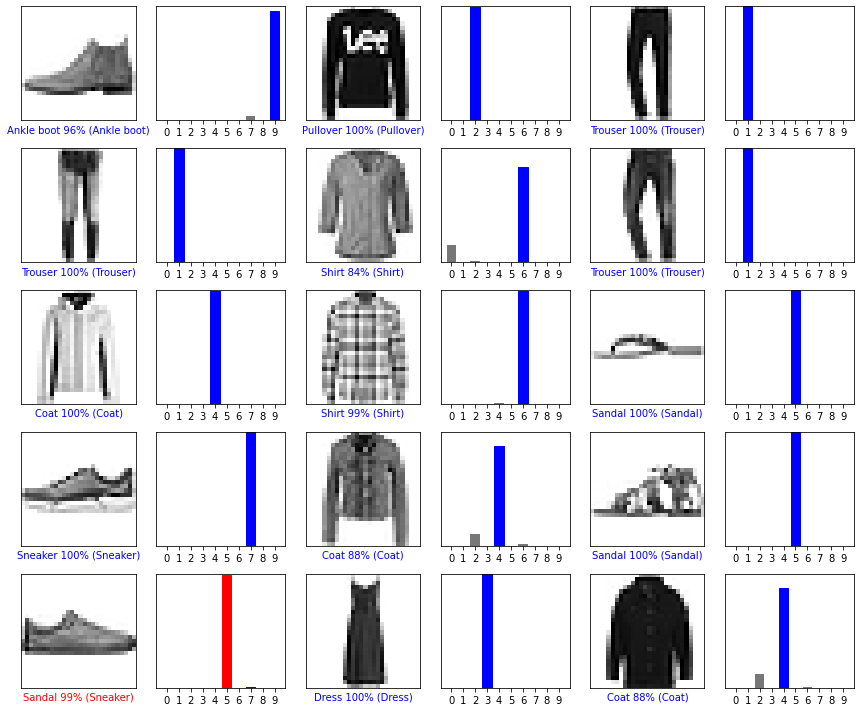

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [41]:
img = test_images[1]

print(img.shape)

(28, 28)


In [42]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)
